In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")

In [3]:
df.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
df.tail(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9990,15798964,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,15769959,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,15657105,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,15569266,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,15719294,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
df.shape

(10000, 12)

In [6]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [7]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [8]:
num_cols = df._get_numeric_data().columns
num_cols

Index(['customer_id', 'credit_score', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

In [9]:
cat_cols = ['country', 'gender']
from sklearn.preprocessing import OneHotEncoder
df_new = pd.get_dummies(df, columns = cat_cols, drop_first = True)
df_new.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [10]:
from sklearn.preprocessing import minmax_scale

for i in df_new.columns:
    df_new[i] = minmax_scale(df_new[i])
    
df_new.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,0.275616,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,0.0,0.0,0.0
1,0.326454,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.0,1.0,0.0
2,0.214421,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,0.0,0.0,0.0
3,0.542636,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,0.0,0.0,0.0
4,0.688778,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.0,1.0,0.0


In [11]:
df_new.shape

(10000, 13)

In [12]:
X = df_new.loc[:, df_new.columns != 'churn']
Y = df_new['churn']

In [13]:
X.shape

(10000, 12)

In [14]:
X.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male
0,0.275616,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,0.0,0.0,0.0
1,0.326454,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,1.0,0.0
2,0.214421,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,0.0,0.0,0.0
3,0.542636,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,0.0,0.0
4,0.688778,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,1.0,0.0


In [15]:
Y.shape

(10000,)

In [16]:
Y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: churn, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt 
import seaborn as sns

def splitting(t_size):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=t_size, random_state=0)
    
    
    classifier = LogisticRegression(random_state = 0)
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print ("Accuracy:", accuracy)
    
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix: \n", cm)
    
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print('Precision:', precision)
    print('Recall:', recall)
    print('f1_score:', f1)
    
    
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
    plt.title(all_sample_title, size = 12)
    plt.show()

Accuracy: 0.808
Confusion Matrix: 
 [[3053  119]
 [ 649  179]]
Precision: 0.6006711409395973
Recall: 0.21618357487922704
f1_score: 0.31793960923623443


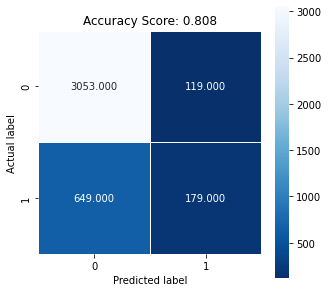

In [18]:
splitting(0.4)


Accuracy: 0.8106666666666666
Confusion Matrix: 
 [[2295   84]
 [ 484  137]]
Precision: 0.6199095022624435
Recall: 0.22061191626409019
f1_score: 0.32541567695962


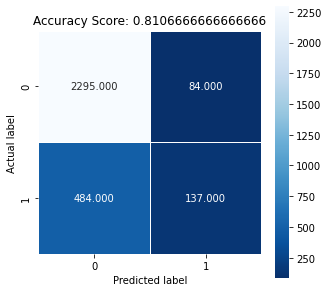

In [19]:
splitting(0.3)

Accuracy: 0.8135
Confusion Matrix: 
 [[1535   60]
 [ 313   92]]
Precision: 0.6052631578947368
Recall: 0.2271604938271605
f1_score: 0.3303411131059246


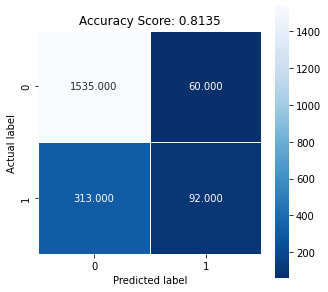

In [20]:
splitting(0.2)

Accuracy: 0.808
Confusion Matrix: 
 [[764  30]
 [162  44]]
Precision: 0.5945945945945946
Recall: 0.21359223300970873
f1_score: 0.3142857142857142


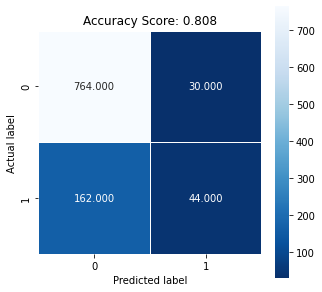

In [21]:
splitting(0.1)